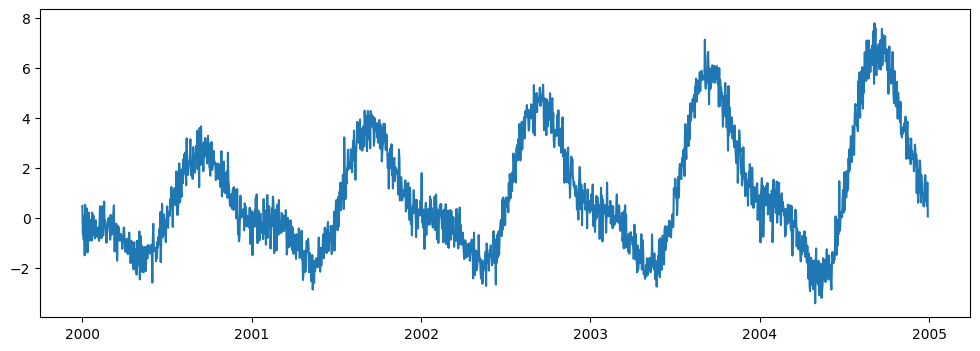

In [2]:
from sklearn.dummy import DummyRegressor
from sklego.datasets import make_simpleseries
from sklego.meta import GroupedPredictor, DecayEstimator
import matplotlib.pyplot as plt
import pandas as pd


yt = make_simpleseries(seed=1)
dates = pd.date_range("2000-01-01", periods=len(yt))

df = (pd.DataFrame({"y": yt,
                    "date": dates})
    .assign(m=lambda d: d.date.dt.month)
    .reset_index())

plt.figure(figsize=(12, 4))
plt.plot(dates, make_simpleseries(seed=1))

In [3]:
df

,index,y,date,m
0,0,0.468623,2000-01-01,1
1,1,-0.653622,2000-01-02,1
2,2,-0.615641,2000-01-03,1
3,3,-0.891481,2000-01-04,1
4,4,0.074618,2000-01-05,1
...,...,...,...,...
1820,1820,0.650863,2004-12-25,12
1821,1821,0.859795,2004-12-26,12
1822,1822,0.470901,2004-12-27,12
1823,1823,1.399010,2004-12-28,12


In [4]:
len(yt)

1825

In [9]:
mod1 = (GroupedPredictor(DummyRegressor(), groups=['m'])
    .fit(df['m'], df['yt']))

plt.figure(figsize=(12, 4))
plt.plot(df['yt'], alpha=0.5);
plt.plot(mod1.predict(df[['m']]), label="grouped")
plt.legend();

KeyError: 'yt'